In [ ]:
!pip install pybind11
!pip install fastwer
!pip install pytesseract
import cv2
import fastwer
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import os
import pandas as pd
from difflib import SequenceMatcher

# Step 1: Upload OCR output files
print("Please upload your OCR output files:")
uploaded_ocr = files.upload()

# Step 2: Upload the reference text file
print("Please upload your reference text file (ground_truth.txt):")
uploaded_ref = files.upload()

# Step 3: Create directories for OCR output and reference text files
ocr_dir = './ocr_output/'
ref_dir = './ref_text/'

os.makedirs(ocr_dir, exist_ok=True)
os.makedirs(ref_dir, exist_ok=True)

# Step 4: Save uploaded OCR files
for filename in uploaded_ocr.keys():
    with open(os.path.join(ocr_dir, filename), 'wb') as f:
        f.write(uploaded_ocr[filename])

# Step 5: Save the reference file
for filename in uploaded_ref.keys():
    #if filename == 'Ground_Truth.txt':
        with open(os.path.join(ref_dir, filename), 'wb') as f:
            f.write(uploaded_ref[filename])

# Step 6: List the uploaded files
print("OCR Output Files:")
ocr_files = os.listdir(ocr_dir)
print(ocr_files)

print("Reference Text Files:")
ref_files = os.listdir(ref_dir)
print(ref_files)


# Step 8: Create empty lists to store data
data = {

    'ocr_output': [],
    'ref_text': [],
    'cer': [],
    'wer': []
}



   # Step 10: Loop through OCR output files and read corresponding ocr_ouput file
for ref_file in ref_files:
    if ref_file.endswith('.txt'):
        print(f"Processing file: {ref_file}")

        # Read OCR output lines
        with open(os.path.join(ref_dir, ref_file), 'r') as file:
            ref_text_lines = file.readlines()
            print(f"OCR ref Lines for {ref_file}:")
            print(ref_text_lines)

# Step 10: Loop through OCR output files and read corresponding ground truth
for ocr_file in ocr_files:
    if ocr_file.endswith('.txt'):
        print(f"Processing file: {ocr_file}")

        # Read OCR output lines
        with open(os.path.join(ocr_dir, ocr_file), 'r') as file:
            ocr_output_lines = file.readlines()
            print(f"OCR Output Lines for {ocr_file}:")
            print(ocr_output_lines)

        # to ensure both files have the same number of lines
        if len(ocr_output_lines) != len(ref_text_lines):
            print(f"Line count mismatch in {ocr_file}")
            continue

        # Process each line
        for ocr_output, ref_text in zip(ocr_output_lines, ref_text_lines):
            ocr_output = ocr_output.strip()  # Remove leading/trailing whitespace
            ref_text = ref_text.strip()  # Remove leading/trailing whitespace

            #calculate CER and WER
            cer = fastwer.score_sent(ocr_output, ref_text, char_level=True)
            wer = fastwer.score_sent(ocr_output, ref_text, char_level=False)
            # Append data to lists

            data['ocr_output'].append(ocr_output)
            data['ref_text'].append(ref_text)
            data['cer'].append(cer)
            data['wer'].append(wer)
# Step 11: Create DataFrame from dictionary
df_output = pd.DataFrame(data)

# Display the DataFrame
df_output


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.8/238.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastwer: filename=fastwer-0.1.3-cp310-cp310-linux_x86_64.whl size=849497 sha256=c9fce0e481614a6abbb0be7cbb968b6ca3bc06c39f817ff5f02b8f529fe4155e
  Stored in directory: /root/.cache/pip/wheels/99/b5/22/f6edc9a914bf3b54ebc55e258e2f9aa2297908d85799de228f
Successfully built fastwer
Please upload your OCR output files:


Saving sortie_ocr.txt to sortie_ocr.txt
Please upload your reference text file (ground_truth.txt):


Saving Ground_Truth.txt to Ground_Truth.txt
OCR Output Files:
['sortie_ocr.txt']
Reference Text Files:
['Ground_Truth.txt']
Processing file: Ground_Truth.txt
OCR ref Lines for Ground_Truth.txt:
['LA LIBRE BELGIQUE\n', 'Nuits terribles \n', 'Voulez-vous éviter les nuits terribles pendant lesquelles une rage de dents vous accable? Faites comme ces personnes, ayez toujours chez vous un flacon de DENTOGÈNE. \n', 'qui, en quelques secondes, coupe net et pour toujours, les plus violents maux de dents.\n', 'Gare aux imitations, exigez le véritable DENTOGÈNE. \n', 'Le flacon 8 francs toutes pharmacies. \n', 'a 205 \n', 'Madame, Mademoiselle, \n', "Vous serez enchantées si vous suivez les Cours de Coupe et de Couture par correspondance de l'INSTITUT FEMINA BRUXELLES\n", "En quatre mois d'études, faciles et agréables, vous apprendrez a couper et confectionner les plus élégantes créations de la mode. \n", 'Ecrivez-nous en y joignant le << Bon >> ci dessous. \n', "Bon A renvoyer à : l'INSTITUT FEM

,ocr_output,ref_text,cer,wer
0,T« Lft LIBRE BELGIOAJE,LA LIBRE BELGIQUE,52.9412,100.0000
1,Nuits terribles,Nuits terribles,0.0000,0.0000
2,Voulez-vous éviter les nuits lernbles pendant ...,Voulez-vous éviter les nuits terribles pendant...,4.7904,20.0000
3,"qui, en quelques secondes, coupe net et pour t...","qui, en quelques secondes, coupe net et pour t...",1.1494,6.6667
4,"Gare aux imitations, exigez le véritable DENTO...","Gare aux imitations, exigez le véritable DENTO...",1.8868,14.2857
5,Le flacon o troncs toutes pharmacies.,Le flacon 8 francs toutes pharmacies.,8.1081,33.3333
6,a :o.ï,a 205,100.0000,50.0000
7,"Madame, Mademoiselle,","Madame, Mademoiselle,",0.0000,0.0000
8,Vous serez enchantées si vous suivet les Cours...,Vous serez enchantées si vous suivez les Cours...,10.8333,36.8421
9,En quatro mois d'études. j lacilas et agréable...,"En quatre mois d'études, faciles et agréables,...",14.9254,40.0000


In [ ]:
# Overall performances
sent_stat['cer'] = df_output['cer']
sent_stat['wer'] = df_output['wer']

mean_cer = df_output['cer'].mean()
mean_wer = df_output['wer'].mean()
print(f'Mean CER = {mean_cer}%, Mean WER = {mean_wer}%')

Mean CER = 12.80438%, Mean WER = 33.632338181818184%


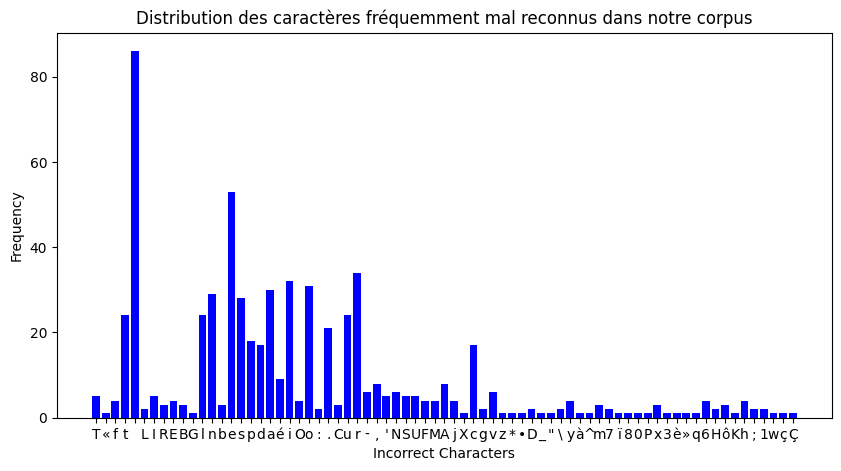

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

def extract_incorrect_chars(ocr_output, ref_text):
    """Extract characters from the OCR output that do not match the reference text."""
    incorrect_chars = []
    # Compare each character
    for o_char, r_char in zip(ocr_output, ref_text):
        if o_char != r_char:
            incorrect_chars.append((o_char, r_char))
    return incorrect_chars

# Initialize a Counter to store incorrect characters
incorrect_char_counter = Counter()

# Analyze all entries to count incorrect characters
for ocr_output, ref_text in zip(data['ocr_output'], data['ref_text']):
    mismatches = extract_incorrect_chars(ocr_output, ref_text)
    # Update the counter with OCR characters that were incorrect
    for o_char, r_char in mismatches:
        incorrect_char_counter[o_char] += 1

# Prepare data for plotting
chars, counts = zip(*incorrect_char_counter.items())

plt.figure(figsize=(10, 5))
plt.bar(chars, counts, color='blue')
plt.xlabel('Incorrect Characters')
plt.ylabel('Frequency')
plt.title('Distribution des caractères fréquemment mal reconnus dans notre corpus')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility if needed
plt.show()


In [ ]:
from scipy.stats import pearsonr
# Calculate Pearson correlation coefficient between CER and WER
pearson_corr, _ = pearsonr(df_output['cer'], df_output['wer'])
print(f'Pearson correlation coefficient between CER and WER: {pearson_corr}')

Pearson correlation coefficient between CER and WER: 0.6974202945335299


In [ ]:
pip install editdistance


In [ ]:
import pandas as pd
import editdistance
import random

In [ ]:
# Chemins fictifs des fichiers texte
aligned_words_file = './ocr_output/sortie_ocr.txt'
aligned_gs_words_file = './ref_text/Ground_Truth.txt'


# Chargement des fichiers texte
with open(aligned_words_file, 'r', encoding='utf-8') as f:
    aligned_words = f.readlines()

with open(aligned_gs_words_file, 'r', encoding='utf-8') as f:
    aligned_gs_words = f.readlines()

# Nettoyage des lignes (enlever les sauts de ligne)
aligned_words = [line.strip() for line in aligned_words]
aligned_gs_words = [line.strip() for line in aligned_gs_words]

<Axes: >

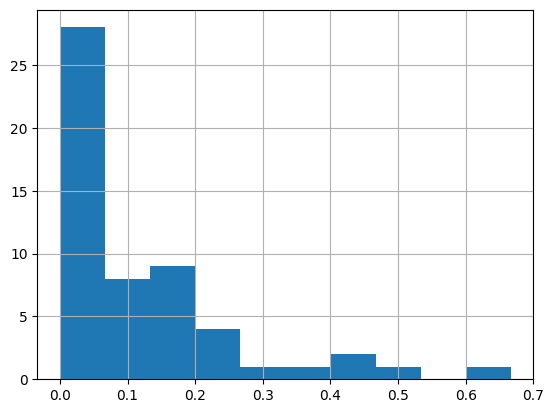

In [ ]:
######################## calcul et affichage de la distanc de levinstein de notre corpus
sent_stat = pd.DataFrame({"ocr_sentence": aligned_words, "gs_sentence": aligned_gs_words})

def compute_sent_edit_distance(x):
    ''' Compute sentence edit distance normalized by the length of the sentence'''
    ocr_sent = "".join(x['ocr_sentence'])
    gs_sent = "".join(x['gs_sentence'])
    return editdistance.distance(ocr_sent, gs_sent) / max(len(ocr_sent), len(gs_sent))

sent_stat["sent_edit_distance"] = sent_stat.apply(compute_sent_edit_distance, axis=1)
### generation du graphique
sent_stat["sent_edit_distance"].hist()

In [ ]:
########################## comptage des bonne et mauvaise phrase de notre corpus

MAXIMUM_AVERAGE_EDIT_DISTANCE_RATE = 0.00
total_sent = sent_stat.shape[0]
good_sent = (sent_stat["sent_edit_distance"] <= MAXIMUM_AVERAGE_EDIT_DISTANCE_RATE).sum()
good_sent_ratio = good_sent / total_sent
print("Bonnes phrases: %s\nPhrases totales: %s\nRatio de bonnes phrases: %s" % (good_sent, total_sent, good_sent_ratio))

Bonnes phrases: 18
Phrases totales: 55
Ratio de bonnes phrases: 0.32727272727272727


In [ ]:
################# visuel de distance d'edition entre les phrase ocr et la traduction de reference

good_sentences_stat = sent_stat[sent_stat["sent_edit_distance"] <= MAXIMUM_AVERAGE_EDIT_DISTANCE_RATE]
i = random.randint(0, good_sentences_stat.shape[0] - 1)

good_sentences_stat[i: i + 8].sort_values("sent_edit_distance", ascending=False)

,ocr_sentence,gs_sentence,sent_edit_distance
17,Tél. 44.71.14.,Tél. 44.71.14.,0.0
18,6716,6716,0.0
19,Enseignements,Enseignements,0.0
20,Coq s/Mer,Coq s/Mer,0.0
21,""" Chant d'oiseaux „",""" Chant d'oiseaux „",0.0
27,LANGUES par correspondance.,LANGUES par correspondance.,0.0
38,"Av. des Nerviens, 13.","Av. des Nerviens, 13.",0.0
39,5683,5683,0.0


In [ ]:
# Calcul de la distance d'édition moyenne pour tout le corpus
average_edit_distance = sent_stat["sent_edit_distance"].mean()

print("Distance d'édition moyenne de tout le corpus : %.2f" % average_edit_distance)

Distance d'édition moyenne de tout le corpus : 0.12


In [ ]:
# Calcul du coefficient de corrélation de Pearson entre la distance d'édition et le CER
pearson_corr, _ = pearsonr(sent_stat['sent_edit_distance'], sent_stat['cer'])
print(f'Pearson correlation coefficient between edit distance and CER: {pearson_corr}')

Pearson correlation coefficient between edit distance and CER: 0.9771713787719757


In [ ]:
# Calcul du coefficient de corrélation de Pearson entre la distance d'édition et le WER
pearson_corr, _ = pearsonr(sent_stat['wer'],sent_stat['sent_edit_distance'] )
print(f'Pearson correlation coefficient between edit distance and wER: {pearson_corr}')

Pearson correlation coefficient between edit distance and wER: 0.7920522746267719
